## Project Name: Book Recommendation System

<img src="logo.PNG">

<u>Why do we need Recommendation Systems?</u>
* With increasing use of Online shopping, customers have nearly infinite choices. Recommendation systems help customers by finding product and content they care about without wasting their time surfing entire catlog.

<u>Uses of Recommendation System?</u><p>
    * E-commerce websites
    * Social media website 
    * Music Streaming services 
    * Online Movie Service 
    * Online dating applications
    * Insurance Companies
    * Bank and investment company
    
<u> Ways of making Recommendations </u>
    * Content based recommendation
    * Collaborative filtering 
    * Association Rule Learning
    

## Business Objective
* To improve customer engagement, using predictive analytics to make the 'next step' recommendations to customers as to what books they can purchased.
* Based on their profile, i would like to present options to them that other customers with similar profiles have read purchased
* Based on their past usage and interactions, i would like to make recommendations for Books they would prefer reading in the near future.
* How can i recommend books to long term vs short term customers if they both show similar book purchase pattern?

## Importing required library

In [3]:
import numpy as np
import pandas as pd

## Data Gathering

In this project, i am considering book a product which i want to 

In [6]:
data = pd.read_csv('BX-Book-Ratings.csv',
                     sep=";",
                     header=0,
                     error_bad_lines=False,
                    encoding='latin1',
                  names=['user','isbn','rating'])

In [9]:
bookFile = 'BX-Books.csv'
books = pd.read_csv(bookFile,
                    sep=";",
                    header=0,
                    error_bad_lines=False,
                    usecols=[0,1,2], 
                    index_col=0,
                    encoding='latin1',
                    names=['isbn','title','author'])

In [10]:
data.head(2)

,user,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [11]:
books.head(2)

,title,author
isbn,,
0195153448,Classical Mythology,Mark P. O. Morford
0002005018,Clara Callan,Richard Bruce Wright


## Data Cleansing

## Exploratory Data Analysis

## Data Mining and Predictive Analytics

##### 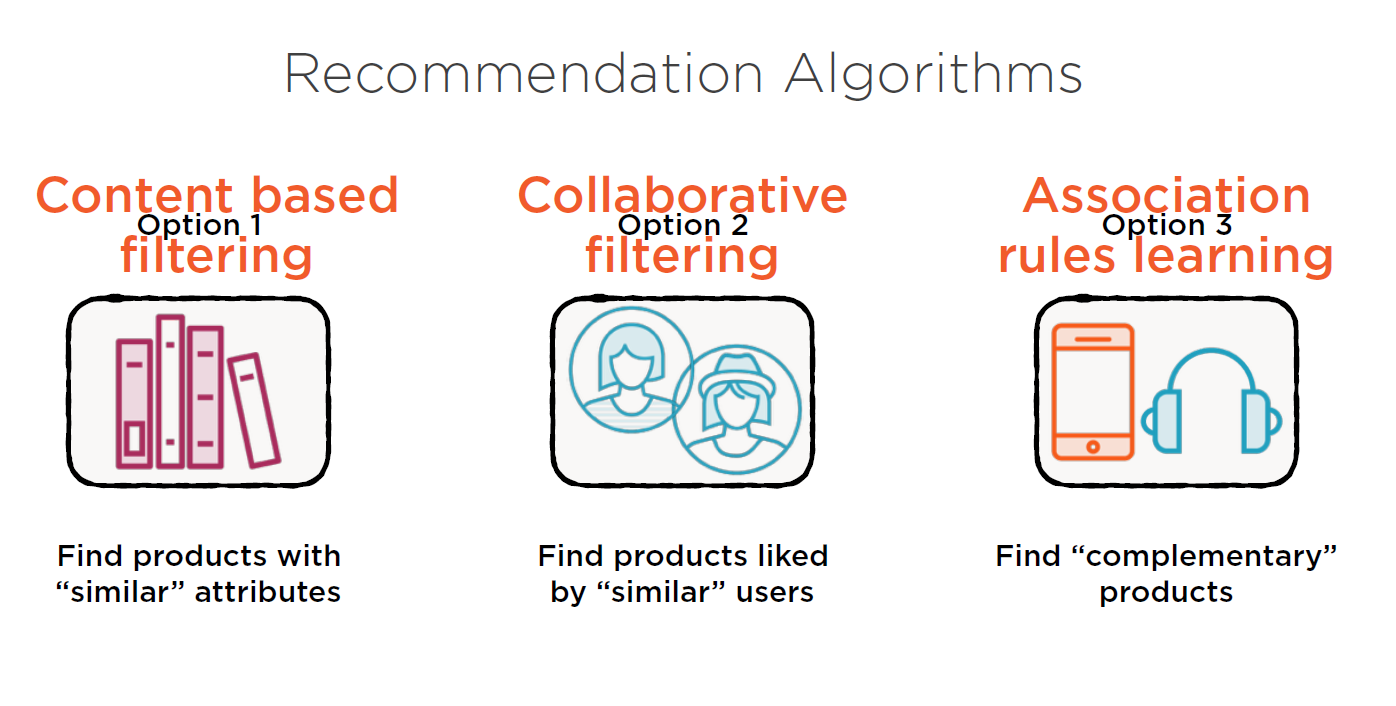

### Nearest Neighbor Model

In [5]:
def bookMeta(isbn):
    title = books.at[isbn,"title"]
    author = books.at[isbn,"author"]
    return title, author
bookMeta("0671027360")

('Angels &amp; Demons', 'Dan Brown')

In [7]:
data = data[data["isbn"].isin(books.index)]

In [6]:
def faveBooks(user,N):
    userRatings = data[data["user"]==user]
    sortedRatings = pd.DataFrame.sort_values(userRatings,['rating'],ascending=[0])[:N] 
    sortedRatings["title"] = sortedRatings["isbn"].apply(bookMeta)
    return sortedRatings

In [8]:
faveBooks(204622,5)

,user,isbn,rating,title
844955,204622,0967560500,10,"(Natural Hormonal Enhancement, Rob Faigin)"
844935,204622,0671027360,10,"(Angels &amp; Demons, Dan Brown)"
844926,204622,0385504209,10,"(The Da Vinci Code, Dan Brown)"
844958,204622,097173660X,9,"(Life After School Explained, Cap &amp; Compass)"
844920,204622,0060935464,9,"(To Kill a Mockingbird, Harper Lee)"


In [9]:
data.shape

(1031175, 3)

In [10]:
usersPerISBN = data.isbn.value_counts()
usersPerISBN.head(10)

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
Name: isbn, dtype: int64

In [11]:
usersPerISBN.shape

(270170,)

In [12]:
ISBNsPerUser = data.user.value_counts()

In [13]:
ISBNsPerUser.shape

(92107,)

In [14]:
data = data[data["isbn"].isin(usersPerISBN[usersPerISBN>10].index)]

In [15]:
data = data[data["user"].isin(ISBNsPerUser[ISBNsPerUser>10].index)]

In [16]:
userItemRatingMatrix=pd.pivot_table(data, values='rating',
                                    index=['user'], columns=['isbn'])

In [17]:
userItemRatingMatrix.head()

isbn,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,0006485200,000649840X,000651202X,0006512062,...,8845906884,8845915611,8878188212,8885989403,9074336329,9074336469,950491036X,9681500830,9681500954,9871138016
user,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
userItemRatingMatrix.shape

(10706, 15451)

In [19]:
user1 = 204622
user2 = 255489

In [20]:
user1Ratings = userItemRatingMatrix.transpose()[user1]
user1Ratings.head()

isbn
0002005018   NaN
0002251760   NaN
0002259834   NaN
0002558122   NaN
0006480764   NaN
Name: 204622, dtype: float64

In [21]:
user2Ratings = userItemRatingMatrix.transpose()[user2]

In [22]:
from scipy.spatial.distance import hamming 
hamming(user1Ratings,user2Ratings)

0.99993527926995018

In [23]:
import numpy as np
def distance(user1,user2):
        try:
            user1Ratings = userItemRatingMatrix.transpose()[user1]
            user2Ratings = userItemRatingMatrix.transpose()[user2]
            distance = hamming(user1Ratings,user2Ratings)
        except: 
            distance = np.NaN
        return distance 

In [24]:
distance(204622,10118)

0.99987055853990037

In [25]:
user = 204622
allUsers = pd.DataFrame(userItemRatingMatrix.index)
allUsers = allUsers[allUsers.user!=user]
allUsers.head()

,user
0,8
1,99
2,242
3,243
4,254


In [26]:
allUsers["distance"] = allUsers["user"].apply(lambda x: distance(user,x))

In [27]:
allUsers.head()

,user,distance
0,8,1.000000
1,99,1.000000
2,242,0.999935
3,243,0.999935
4,254,1.000000


In [28]:
K = 10
KnearestUsers = allUsers.sort_values(["distance"],ascending=True)["user"][:K]

In [29]:
KnearestUsers

3201     82893
3368     87555
2624     68555
1813     48046
5401    140036
7584    198711
565      16795
8866    232131
239       7346
9693    251422
Name: user, dtype: int64

In [30]:
def nearestNeighbors(user,K=10):
    allUsers = pd.DataFrame(userItemRatingMatrix.index)
    allUsers = allUsers[allUsers.user!=user]
    allUsers["distance"] = allUsers["user"].apply(lambda x: distance(user,x))
    KnearestUsers = allUsers.sort_values(["distance"],ascending=True)["user"][:K]
    return KnearestUsers

In [31]:
KnearestUsers = nearestNeighbors(user)

In [32]:
KnearestUsers

3201     82893
3368     87555
2624     68555
1813     48046
5401    140036
7584    198711
565      16795
8866    232131
239       7346
9693    251422
Name: user, dtype: int64

In [33]:
NNRatings = userItemRatingMatrix[userItemRatingMatrix.index.isin(KnearestUsers)]
NNRatings

isbn,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,0006485200,000649840X,000651202X,0006512062,...,8845906884,8845915611,8878188212,8885989403,9074336329,9074336469,950491036X,9681500830,9681500954,9871138016
user,,,,,,,,,,,,,,,,,,,,,
7346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
avgRating = NNRatings.apply(np.nanmean).dropna()
avgRating.head()

/Users/swethakolalapudi/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


isbn
0007154615    1.5
0020125305    0.0
0020125607    0.0
0020198817    0.0
0020198906    8.0
dtype: float64

In [35]:
booksAlreadyRead = userItemRatingMatrix.transpose()[user].dropna().index
booksAlreadyRead

Index([u'006016848X', u'0060935464', u'0140042598', u'0140178724',
       u'0142004278', u'0380732238', u'0385504209', u'0425109720',
       u'0425152898', u'0440136482', u'0440241162', u'0451191145',
       u'0451197127', u'0553096060', u'0671027360', u'0671027387',
       u'0671666258', u'0688174574', u'0743225708', u'076790592X',
       u'0785264280', u'0786868716', u'0802131867', u'0802132952',
       u'0971880107', u'1853260045', u'1853260126', u'1853260207',
       u'185326041X', u'1878424114'],
      dtype='object', name=u'isbn')

In [41]:
avgRating = avgRating[~avgRating.index.isin(booksAlreadyRead)]

In [42]:
N=3
topNISBNs = avgRating.sort_values(ascending=False).index[:N]

In [43]:
pd.Series(topNISBNs).apply(bookMeta)

0              (Love, Greg &amp; Lauren, Greg Manning)
1    (The Two Towers (The Lord of the Rings, Part 2...
2    (Harry Potter and the Sorcerer's Stone (Book 1...
Name: isbn, dtype: object

In [38]:
def topN(user,N=3):
    KnearestUsers = nearestNeighbors(user)
    NNRatings = userItemRatingMatrix[userItemRatingMatrix.index.isin(KnearestUsers)]
    avgRating = NNRatings.apply(np.nanmean).dropna()
    booksAlreadyRead = userItemRatingMatrix.transpose()[user].dropna().index
    avgRating = avgRating[~avgRating.index.isin(booksAlreadyRead)]
    topNISBNs = avgRating.sort_values(ascending=False).index[:N]
    return pd.Series(topNISBNs).apply(bookMeta)

In [39]:
faveBooks(204813,10)

,user,isbn,rating,title
845417,204813,0399149848,10,"(Birthright, Nora Roberts)"
845407,204813,0385504209,10,"(The Da Vinci Code, Dan Brown)"
845382,204813,0373218036,10,"(Truly, Madly Manhattan, Nora Roberts)"
845359,204813,0142001805,10,"(The Eyre Affair: A Novel, Jasper Fforde)"
845431,204813,0446527793,10,"(The Guardian, Nicholas Sparks)"
845416,204813,0399149392,10,"(Chesapeake Blue (Quinn Brothers (Hardcover)),..."
845432,204813,0446531332,9,"(Nights in Rodanthe, Nicholas Sparks)"
845434,204813,0446606243,9,"(The Tenth Justice, Brad Meltzer)"
845451,204813,0671027360,9,"(Angels &amp; Demons, Dan Brown)"
845433,204813,0446532452,9,"(The Wedding, Nicholas Sparks)"


In [40]:
topN(204813,10)

0    (Waiting For Nick (Silhouette Special Edition)...
1           (Wringer (Trophy Newbery), Jerry Spinelli)
2    (The Star Wars Trilogy: Star Wars, the Empire ...
3          (One, Two, Buckle My Shoe, Agatha Christie)
4                          (On the Road, Jack Kerouac)
5                 (Dead Poets Society, N.H. Kleinbaum)
6     (Go Ask Alice (Avon/Flare Book), James Jennings)
7                        (Carolina Moon, Nora Roberts)
8    (Illusions: The Adventures of a Reluctant Mess...
9    (You Just Don't Duct Tape a Baby!: True Tales ...
Name: isbn, dtype: object